In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

In [40]:
DF_train = pd.read_parquet('yellow_tripdata_2022-01.parquet')
DF_test = pd.read_parquet('yellow_tripdata_2022-02.parquet')

In [41]:
print(df_train.shape)
df_train.info()

(2421440, 20)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421440 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_

In [45]:
def transform(df):
    df['duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
    df['duration'] = df.duration.apply(lambda td: td.total_seconds()/60 )
    print('Duration std: ', str(df.duration.std()))
    print('All data:')

    df = df[(df.duration >=1 ) & (df.duration <= 60)].copy()
    
    print('Data without outliers')
    plt.hist(df.duration, bins=100)
    plt.plot()
    
    df[['DOLocationID','PULocationID']] = df[['DOLocationID','PULocationID']].astype(str)    
    return df

Duration std:  46.44530513776802
All data:
Data without outliers


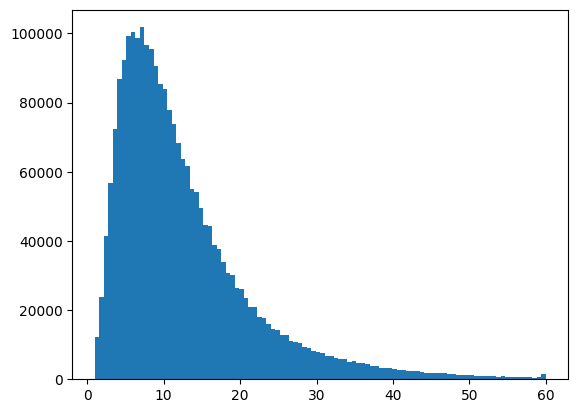

In [46]:
df_train = transform(DF_train)
dict_train = df_train[['DOLocationID','PULocationID','trip_distance']].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(dict_train)
y_train = df_train['duration']

Duration std:  47.26394076778834
All data:
Data without outliers


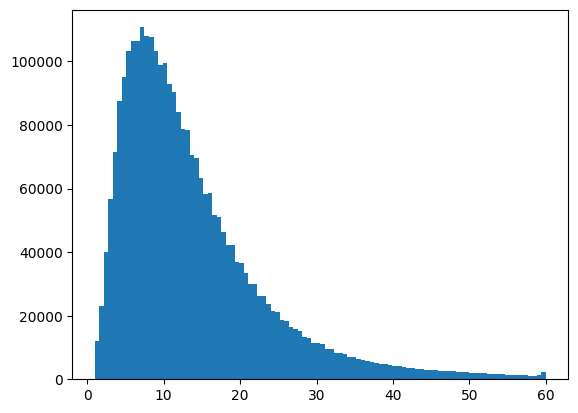

In [47]:
df_test = transform(DF_test)
dict_test = df_test[['DOLocationID','PULocationID','trip_distance']].to_dict(orient='records')
X_test = dv.transform(dict_test)
y_test = df_test['duration']

In [48]:
LR = LinearRegression()

In [54]:
LR.fit(X_train,y_train)
y_pred =LR.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

7.001496179429168

In [55]:
LR.fit(X_train,y_train)
y_pred =LR.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

7.795498346156581